<a href="https://colab.research.google.com/github/abialbon/pytorch-udacity-scholarship/blob/master/CNN/Visualizing_CNN_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


tcmalloc: large alloc 1073750016 bytes == 0x581a8000 @  0x7f41870a22a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.MNIST('data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

In [21]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, 3, padding=1)
        self.conv2 = nn.Conv2d(4, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(14*14*8, 10)
        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = x.view(-1, 14*14*8)
        x = F.log_softmax(self.fc(x))
        return x
    

model = CNNClassifier()
model.to(device)

CNNClassifier(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [23]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_buffers',
 '_apply',
 '_backend',
 '_backward_hooks',
 '_buffers',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_modules',
 '_parameters',
 '_slow_forward',
 '_tracing_name',
 '_version',
 'add_module',
 'apply',
 'children',
 'conv1',
 'conv2',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'fc',
 'float',
 'forward',
 'half',
 'load_state_dict',
 'modules',
 'named_children',
 'named_modules',
 'named_parameters',
 'parameters',
 'pool',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook'

In [36]:
x, y = next(iter(trainloader))
x1 = x[1]
x1.shape

torch.Size([1, 28, 28])

In [42]:
input = x1.unsqueeze(0).to(device)
output = model._modules['conv1'](input)
print(input.shape)
print(output.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 4, 28, 28])


In [62]:
output2 = model._modules['conv2'](output)
output2.shape

torch.Size([1, 8, 28, 28])

In [0]:
def imshow(t):
    t = t.squeeze(0)
    t = t.detach().cpu().numpy()
    m = np.array([0.5])
    t = (t * m) + m
    t = t.clip(0, 1)
    print(t.shape)
    return(t.squeeze())

(28, 28)


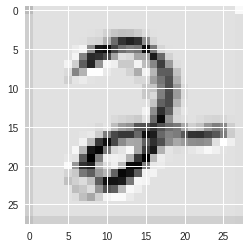

In [55]:
imshow(output[0, 0])

(28, 28)
(28, 28)
(28, 28)
(28, 28)


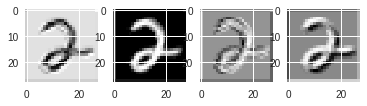

In [60]:
fig, ax = plt.subplots(1, 4)
for i, row in enumerate(ax):
    row.imshow(imshow(output[0, i]))

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


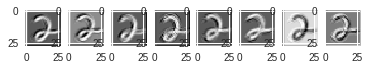

In [63]:
fig, ax = plt.subplots(1, 8)
for i, row in enumerate(ax):
    row.imshow(imshow(output2[0, i]))